In [6]:
pip install xgboost

     |████████████████████████████████| 2.2 MB 1.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,accuracy_score ,confusion_matrix
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [3]:
data=pd.read_csv("matches.csv")

In [4]:
data.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
1,2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
2,3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
3,4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
4,6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


In [5]:
data.isnull().sum()

Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance       696
captain            0
formation          0
referee            0
match report       0
notes           1389
sh                 0
sot                0
dist               1
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64

In [6]:
data.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
1,2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
2,3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
3,4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
4,6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1389 non-null   int64  
 1   date          1389 non-null   object 
 2   time          1389 non-null   object 
 3   comp          1389 non-null   object 
 4   round         1389 non-null   object 
 5   day           1389 non-null   object 
 6   venue         1389 non-null   object 
 7   result        1389 non-null   object 
 8   gf            1389 non-null   float64
 9   ga            1389 non-null   float64
 10  opponent      1389 non-null   object 
 11  xg            1389 non-null   float64
 12  xga           1389 non-null   float64
 13  poss          1389 non-null   float64
 14  attendance    693 non-null    float64
 15  captain       1389 non-null   object 
 16  formation     1389 non-null   object 
 17  referee       1389 non-null   object 
 18  match report  1389 non-null 

In [8]:
data.describe()

,Unnamed: 0,gf,ga,xg,xga,poss,attendance,notes,sh,sot,dist,fk,pk,pkatt,season
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,693.000000,0.0,1389.000000,1389.000000,1388.000000,1389.000000,1389.000000,1389.000000,1389.000000
mean,22.771778,1.335493,1.380850,1.304176,1.338445,49.702664,36089.963925,NaN,12.153348,4.041037,17.011527,0.455724,0.119510,0.147588,2021.452844
std,13.668172,1.274235,1.291049,0.767268,0.789360,12.401897,17797.991778,NaN,5.268876,2.403866,2.988364,0.665389,0.352187,0.387804,0.497951
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,NaN,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2021.000000
25%,11.000000,0.000000,0.000000,0.700000,0.700000,40.000000,24351.000000,NaN,8.000000,2.000000,15.100000,0.000000,0.000000,0.000000,2021.000000
50%,22.000000,1.000000,1.000000,1.200000,1.200000,50.000000,32061.000000,NaN,12.000000,4.000000,16.900000,0.000000,0.000000,0.000000,2021.000000
75%,33.000000,2.000000,2.000000,1.800000,1.800000,59.000000,52214.000000,NaN,15.000000,5.000000,18.800000,1.000000,0.000000,0.000000,2022.000000
max,59.000000,9.000000,9.000000,4.600000,5.000000,82.000000,73458.000000,NaN,31.000000,15.000000,34.900000,4.000000,3.000000,3.000000,2022.000000


In [9]:
cols = ['attendance', 'dist']

for col in cols:
    most_frequent = data[col].value_counts().sort_values(ascending=False).index[0]
    data[col].fillna(most_frequent, inplace=True)
    print('All the missing values in column', col, 'are replaced with', most_frequent)

All the missing values in column attendance are replaced with 2000.0
All the missing values in column dist are replaced with 17.0


In [10]:
data.isnull().sum()

Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance         0
captain            0
formation          0
referee            0
match report       0
notes           1389
sh                 0
sot                0
dist               0
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64

In [11]:
data = data.drop(columns=['notes','comp','match report'])

In [12]:
data

,Unnamed: 0,date,time,round,day,venue,result,gf,ga,opponent,...,formation,referee,sh,sot,dist,fk,pk,pkatt,season,team
0,1,2021-08-15,16:30,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,4-3-3,Anthony Taylor,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
1,2,2021-08-21,15:00,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,4-3-3,Graham Scott,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
2,3,2021-08-28,12:30,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,4-3-3,Martin Atkinson,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
3,4,2021-09-11,15:00,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,4-3-3,Paul Tierney,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
4,6,2021-09-18,15:00,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,4-3-3,Jonathan Moss,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,38,2021-05-02,19:15,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,3-4-1-2,Andre Marriner,8.0,1.0,17.4,0.0,0.0,0.0,2021,Sheffield United
1385,39,2021-05-08,15:00,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,3-5-2,Simon Hooper,7.0,0.0,11.4,1.0,0.0,0.0,2021,Sheffield United
1386,40,2021-05-16,19:00,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,3-4-3,Jonathan Moss,10.0,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United
1387,41,2021-05-19,18:00,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,3-4-3,Robert Jones,11.0,1.0,16.0,1.0,0.0,0.0,2021,Sheffield United


In [13]:
data['date'] = pd.to_datetime(data['date'])

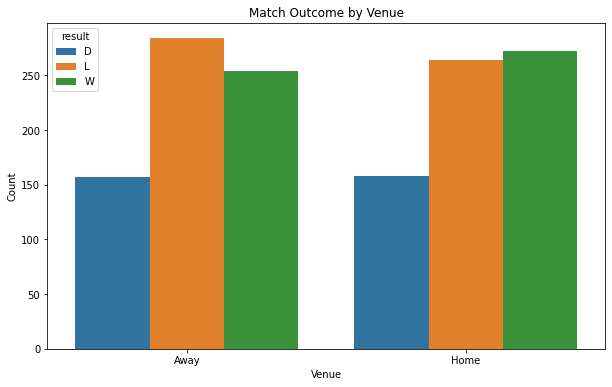

In [14]:

venue_outcomes = data.groupby(['venue', 'result']).size().reset_index(name='count')

# Create a stacked bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(x='venue', y='count', hue='result', data=venue_outcomes,)

# Add title and labels
plt.title('Match Outcome by Venue')
plt.xlabel('Venue')
plt.ylabel('Count')

plt.show()

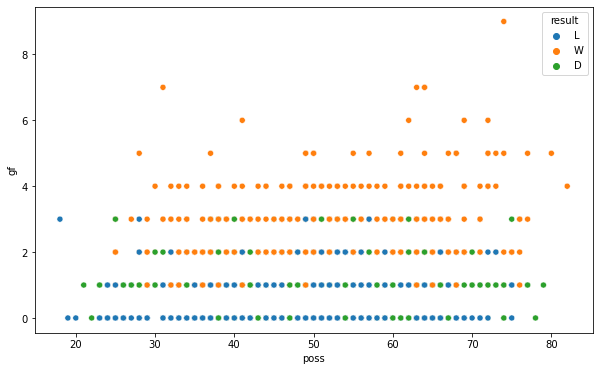

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='poss',y='gf',hue='result',data=data)
plt.show()

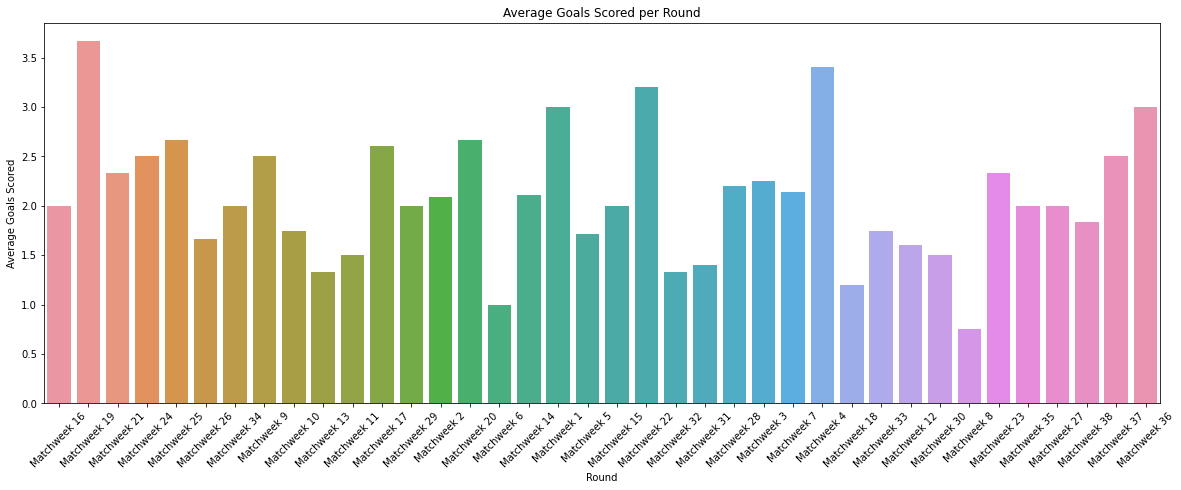

In [103]:
plt.figure(figsize=(20, 7))
sns.barplot(data=data, x='round', y='gf', ci=None)
plt.title('Average Goals Scored per Round')
plt.xlabel('Round')
plt.ylabel('Average Goals Scored')
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Goal Scored')

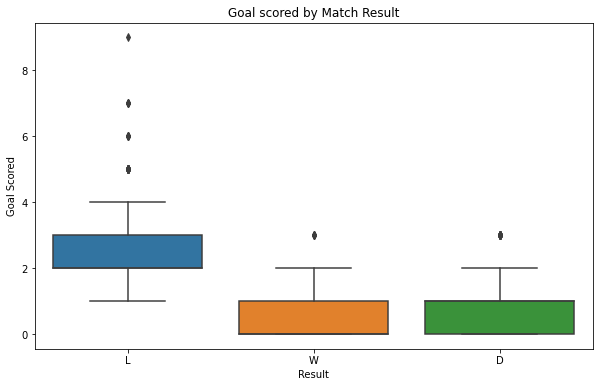

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='result',y='ga',data=data)

plt.title('Goal scored by Match Result')
plt.xlabel('Result')
plt.ylabel('Goal Scored')


<AxesSubplot:xlabel='ga', ylabel='Density'>

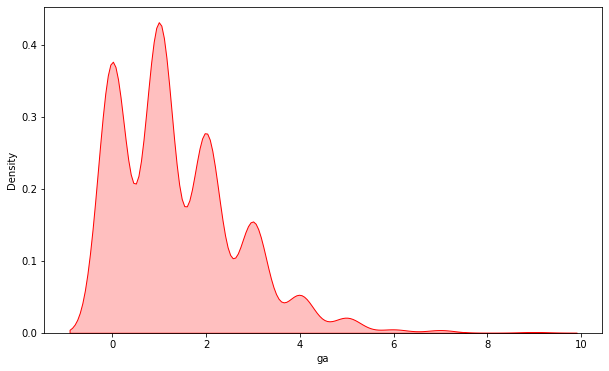

In [18]:
plt.figure(figsize=(10,6))
sns.kdeplot(data['ga'], fill=True,color='red')


<AxesSubplot:xlabel='formation', ylabel='Count'>

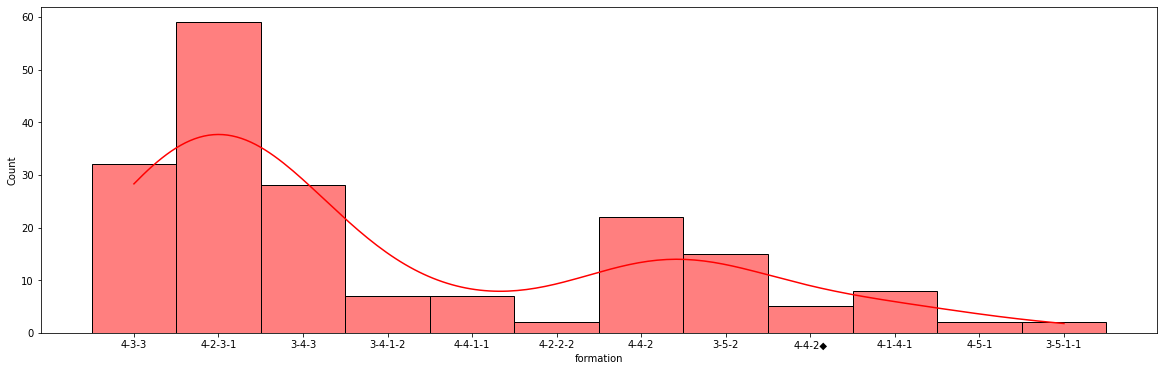

In [107]:
plt.figure(figsize=(20,6))
sns.histplot(data['formation'], kde=True,color='Red')

In [20]:
data.columns

Index(['Unnamed: 0', 'date', 'time', 'round', 'day', 'venue', 'result', 'gf',
       'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt',
       'season', 'team'],
      dtype='object')

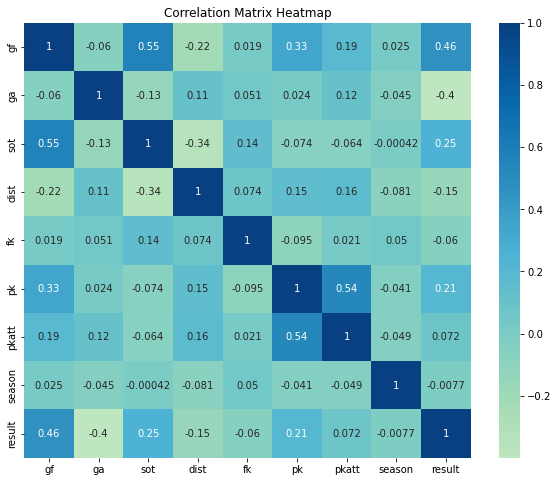

In [96]:
numerical_columns = ['gf','ga','sot','dist','fk','pk','pkatt','season','team','result']
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='GnBu', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [22]:
data["date"] = pd.to_datetime(data["date"])

In [23]:
data["venue_code"] = data["venue"].astype("category").cat.codes
data["opp_code"] = data["opponent"].astype("category").cat.codes
data["hour"] =data["time"].str.replace(":.+","",regex=True).astype("int")

In [24]:
data

,Unnamed: 0,date,time,round,day,venue,result,gf,ga,opponent,...,sot,dist,fk,pk,pkatt,season,team,venue_code,opp_code,hour
0,1,2021-08-15,16:30,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,4.0,16.9,1.0,0.0,0.0,2022,Manchester City,0,18,16
1,2,2021-08-21,15:00,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,4.0,17.3,1.0,0.0,0.0,2022,Manchester City,1,15,15
2,3,2021-08-28,12:30,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,10.0,14.3,0.0,0.0,0.0,2022,Manchester City,1,0,12
3,4,2021-09-11,15:00,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,8.0,14.0,0.0,0.0,0.0,2022,Manchester City,0,10,15
4,6,2021-09-18,15:00,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,1.0,15.7,1.0,0.0,0.0,2022,Manchester City,1,17,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,38,2021-05-02,19:15,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,1.0,17.4,0.0,0.0,0.0,2021,Sheffield United,0,18,19
1385,39,2021-05-08,15:00,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,0.0,11.4,1.0,0.0,0.0,2021,Sheffield United,1,6,15
1386,40,2021-05-16,19:00,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United,0,7,19
1387,41,2021-05-19,18:00,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,1.0,16.0,1.0,0.0,0.0,2021,Sheffield United,0,14,18


In [25]:
data["day_code"] = data["date"].dt.dayofweek

In [26]:
data

,Unnamed: 0,date,time,round,day,venue,result,gf,ga,opponent,...,dist,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code
0,1,2021-08-15,16:30,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,16.9,1.0,0.0,0.0,2022,Manchester City,0,18,16,6
1,2,2021-08-21,15:00,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,17.3,1.0,0.0,0.0,2022,Manchester City,1,15,15,5
2,3,2021-08-28,12:30,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,14.3,0.0,0.0,0.0,2022,Manchester City,1,0,12,5
3,4,2021-09-11,15:00,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,14.0,0.0,0.0,0.0,2022,Manchester City,0,10,15,5
4,6,2021-09-18,15:00,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,15.7,1.0,0.0,0.0,2022,Manchester City,1,17,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,38,2021-05-02,19:15,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,17.4,0.0,0.0,0.0,2021,Sheffield United,0,18,19,6
1385,39,2021-05-08,15:00,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,11.4,1.0,0.0,0.0,2021,Sheffield United,1,6,15,5
1386,40,2021-05-16,19:00,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,17.0,0.0,0.0,0.0,2021,Sheffield United,0,7,19,6
1387,41,2021-05-19,18:00,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,16.0,1.0,0.0,0.0,2021,Sheffield United,0,14,18,2


In [27]:
encoder = LabelEncoder()
data['result'] = encoder.fit_transform(data['result'])
original_categories =encoder.inverse_transform(data['result'])

In [28]:
data.tail()

,Unnamed: 0,date,time,round,day,venue,result,gf,ga,opponent,...,dist,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code
1384,38,2021-05-02,19:15,Matchweek 34,Sun,Away,1,0.0,4.0,Tottenham,...,17.4,0.0,0.0,0.0,2021,Sheffield United,0,18,19,6
1385,39,2021-05-08,15:00,Matchweek 35,Sat,Home,1,0.0,2.0,Crystal Palace,...,11.4,1.0,0.0,0.0,2021,Sheffield United,1,6,15,5
1386,40,2021-05-16,19:00,Matchweek 36,Sun,Away,2,1.0,0.0,Everton,...,17.0,0.0,0.0,0.0,2021,Sheffield United,0,7,19,6
1387,41,2021-05-19,18:00,Matchweek 37,Wed,Away,1,0.0,1.0,Newcastle Utd,...,16.0,1.0,0.0,0.0,2021,Sheffield United,0,14,18,2
1388,42,2021-05-23,16:00,Matchweek 38,Sun,Home,2,1.0,0.0,Burnley,...,17.0,0.0,0.0,0.0,2021,Sheffield United,1,4,16,6


In [29]:
data.columns

Index(['Unnamed: 0', 'date', 'time', 'round', 'day', 'venue', 'result', 'gf',
       'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt',
       'season', 'team', 'venue_code', 'opp_code', 'hour', 'day_code'],
      dtype='object')

In [30]:
data = data[data['pkatt'] != 0]

In [31]:
data

,Unnamed: 0,date,time,round,day,venue,result,gf,ga,opponent,...,dist,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code
15,24,2021-12-11,12:30,Matchweek 16,Sat,Home,2,1.0,0.0,Wolves,...,15.2,0.0,1.0,1.0,2022,Manchester City,1,22,12,5
18,27,2021-12-26,15:00,Matchweek 19,Sun,Home,2,6.0,3.0,Leicester City,...,16.6,1.0,2.0,2.0,2022,Manchester City,1,10,15,6
20,29,2022-01-01,12:30,Matchweek 21,Sat,Away,2,2.0,1.0,Arsenal,...,18.4,0.0,1.0,1.0,2022,Manchester City,0,0,12,5
23,34,2022-02-09,19:45,Matchweek 24,Wed,Home,2,2.0,0.0,Brentford,...,18.8,0.0,1.0,1.0,2022,Manchester City,1,2,19,2
24,35,2022-02-12,17:30,Matchweek 25,Sat,Away,2,4.0,0.0,Norwich City,...,11.6,0.0,0.0,1.0,2022,Manchester City,0,15,17,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,35,2021-04-25,19:00,Matchweek 33,Sun,Away,0,2.0,2.0,Aston Villa,...,21.5,2.0,1.0,1.0,2021,West Bromwich Albion,0,1,19,6
1352,2,2020-09-21,18:00,Matchweek 2,Mon,Away,1,0.0,1.0,Aston Villa,...,20.3,0.0,0.0,1.0,2021,Sheffield United,0,1,18,0
1355,5,2020-10-18,12:00,Matchweek 5,Sun,Home,0,1.0,1.0,Fulham,...,19.1,0.0,1.0,1.0,2021,Sheffield United,1,8,12,6
1356,6,2020-10-24,20:00,Matchweek 6,Sat,Away,1,1.0,2.0,Liverpool,...,18.5,0.0,1.0,1.0,2021,Sheffield United,0,11,20,5


In [85]:
X=data[['venue_code','day_code','hour','opp_code','season','ga','gf','sot','pk','pkatt','dist']]
y=data['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
svm = SVC()
svm.fit(X_train,y_train)
predictions = svm.predict(X_test)


print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print("accuracy score:",accuracy_score(y_test,predictions)*100)

[[ 0  0  4]
 [ 0  0  7]
 [ 0  0 27]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         7
           2       0.71      1.00      0.83        27

    accuracy                           0.71        38
   macro avg       0.24      0.33      0.28        38
weighted avg       0.50      0.71      0.59        38



accuracy score: 71.05263157894737


In [83]:
X=data[['venue_code','day_code','hour','opp_code','season','ga','gf','sot','pk','pkatt','dist']]
y=data['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print("accuracy score:",accuracy_score(y_test,predictions)*100)

[[ 3  0  1]
 [ 1  6  0]
 [ 0  0 27]]


              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       1.00      0.86      0.92         7
           2       0.96      1.00      0.98        27

    accuracy                           0.95        38
   macro avg       0.90      0.87      0.88        38
weighted avg       0.95      0.95      0.95        38



accuracy score: 94.73684210526315


In [90]:
X=data[['venue_code','day_code','hour','opp_code','season','ga','gf','sot','pkatt','dist']]
y=data['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print("accuracy score:",accuracy_score(y_test,predictions)*100)

[[ 6  0  1]
 [ 0 10  0]
 [ 0  0 21]]


              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       1.00      1.00      1.00        10
           2       0.95      1.00      0.98        21

    accuracy                           0.97        38
   macro avg       0.98      0.95      0.97        38
weighted avg       0.97      0.97      0.97        38



accuracy score: 97.36842105263158


In [86]:
X = data.drop('result', axis=1)
y = data['result']


X = pd.get_dummies(X, columns=['date', 'time', 'round', 'day', 'venue', 'opponent', 'captain', 'formation', 'referee', 'team'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}

model = xgb.train(params, dtrain, num_boost_round=params['n_estimators'])


y_pred = model.predict(dtest)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0918551056357955


In [37]:
from xgboost import XGBClassifier
xgb_model = xgb.XGBClassifier()


param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3,error_score='raise')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan

In [92]:
modeling_accuracy_scores = pd.DataFrame(index=['SVM','Decision Tree','Random Forest'],
                                        columns=['accuracy scores'],data=[71.05,97.36,94.73])

In [93]:
modeling_accuracy_scores

,accuracy scores
SVM,71.05
Decision Tree,97.36
Random Forest,94.73
